In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [2]:
sns.set()
sns.set_style("darkgrid")

%load_ext nb_black

<IPython.core.display.Javascript object>

# Análise Exploratória Produção Energica Brasileira

In [3]:
energia = pd.read_excel("ANEEL-dados.ods", engine="odf")
energia.head(8)

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,2022-05-01,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0,Não,-20.124799,-43.870202,2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
1,2022-05-01,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0,Não,-20.131873,-43.876935,2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
2,2022-05-01,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0,Não,-20.137545,-43.891926,2000-08-31,2030-08-31,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
3,2022-05-01,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,47500,Não,-29.064753,-51.674942,2001-03-15,2036-03-15,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,"Bento Gonçalves - RS, Cotiporã - RS"
4,2022-05-01,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,"72 - Uruguai, Inhanduva, Peixe e outros",Floriano Peixoto - RS
5,2022-05-01,Abrasa,16,CGH.PH.SC.000016-7.1,SC,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,1460,0,Não,-26.771667,-52.187500,NaN,NaN,100% para AVELINO BRAGAGNOLO S A INDUSTRIA E C...,"73 - Uruguai, Chapeco,Passo Fundo e outros",Faxinal dos Guedes - SC
6,2022-05-01,Açominas,19,UTE.CM.MG.000019-1.1,MG,UTE,Operação,Fóssil,Carvão mineral,Autorização,...,102890,0,Sim,-20.524608,-43.675469,1999-07-30,2029-07-30,100% para GERDAU AÇOMINAS S/A (APE),NaN,Ouro Branco - MG
7,2022-05-01,Agro Trafo,31,PCH.PH.TO.000031-0.1,TO,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,14040,6800,Não,-11.675639,-46.668158,2017-07-13,2047-07-13,100% para SOCIBE ENERGIA S.A. (PIE),"21 - Tocantins, entre os rios Preto e Parana",Dianópolis - TO


<IPython.core.display.Javascript object>

In [5]:
IEE = pd.read_csv("IEEXDia_09-05-22.csv", sep=";", index_col=False, decimal=",")
IEE

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,AESB3,AES BRASIL,ON NM,18300,5.716
1,ALUP11,ALUPAR,UNT N2,7700,5.897
2,AURE3,AUREN,ON ED NM,13200,5.466
3,CMIG4,CEMIG,PN EDB N1,13300,3.948
4,COCE5,COELCE,PNA,3800,5.543
5,CPLE6,COPEL,PNB ED N2,26500,5.170
6,CPFE3,CPFL ENERGIA,ON ED NM,5600,5.443
7,ELET3,ELETROBRAS,ON N1,5100,5.751
8,ENBR3,ENERGIAS BR,ON NM,9300,5.788
9,ENGI11,ENERGISA,UNT N2,4200,5.658


<IPython.core.display.Javascript object>

In [29]:
IEE.loc[IEE["Qtde. Teórica"] == 7700]

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
1,ALUP11,ALUPAR,UNT N2,7700,5.897
12,EQTL3,EQUATORIAL,ON ED NM,7700,5.382


<IPython.core.display.Javascript object>

In [31]:
IEE.loc[IEE["Qtde. Teórica"] == 7700]["Part. (%)"].sum()

11.279

<IPython.core.display.Javascript object>

In [6]:
QTD = []
Pot_M_Fisca = []
for tick in IEE["Ação"].values:
    QTD.append(
        len(
            energia.loc[
                lambda df: df["DscPropriRegimePariticipacao"].str.find(
                    tick.split(" ")[0] + " "
                )
                != -1
            ]
        )
    )
    Pot_M_Fisca.append(
        energia.loc[
            lambda df: df["DscPropriRegimePariticipacao"].str.find(
                tick.split(" ")[0] + " "
            )
            != -1
        ]["MdaPotenciaFiscalizadaKw"].sum()
    )
IEE["QTD DE USINAS"] = np.array(QTD)  # Cruzando dados do numero de Usinas Elétricas
IEE["Potencia Média Fiscalizada"] = np.array(Pot_M_Fisca)  # Cruzando dados de Potencia


<IPython.core.display.Javascript object>

In [7]:
IEE

,Código,Ação,Tipo,Qtde. Teórica,Part. (%),QTD DE USINAS,Potencia Média Fiscalizada
0,AESB3,AES BRASIL,ON NM,18300,5.716,15,3298365
1,ALUP11,ALUPAR,UNT N2,7700,5.897,0,0
2,AURE3,AUREN,ON ED NM,13200,5.466,0,0
3,CMIG4,CEMIG,PN EDB N1,13300,3.948,38,2950802
4,COCE5,COELCE,PNA,3800,5.543,0,0
5,CPLE6,COPEL,PNB ED N2,26500,5.170,20,3898529
6,CPFE3,CPFL ENERGIA,ON ED NM,5600,5.443,26,640430
7,ELET3,ELETROBRAS,ON N1,5100,5.751,16,3001218
8,ENBR3,ENERGIAS BR,ON NM,9300,5.788,202,2094932
9,ENGI11,ENERGISA,UNT N2,4200,5.658,1054,73060


<IPython.core.display.Javascript object>

In [24]:
energia.loc[
    lambda df: df["DscPropriRegimePariticipacao"].str.find(
        IEE["Ação"].values[1].split(" ")[0] + " "
    )
    != -1
]["MdaPotenciaFiscalizadaKw"].sum()

0

<IPython.core.display.Javascript object>

In [25]:
IEE.loc[IEE["Potencia Média Fiscalizada"] != 0]["Part. (%)"].sum()

54.188

<IPython.core.display.Javascript object>

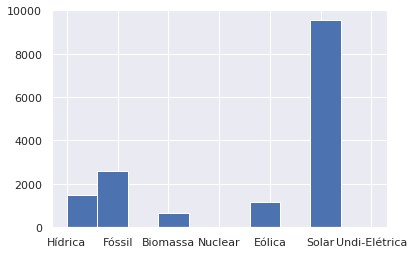

<IPython.core.display.Javascript object>

In [41]:
energia["DscOrigemCombustivel"].hist()
plt.show()

In [36]:
energia["DscOrigemCombustivel"].value_counts()

array([9540, 2571, 1508, 1187,  656,    3,    1])

<IPython.core.display.Javascript object>

In [33]:
energia.groupby(by=["DscOrigemCombustivel"])[["MdaPotenciaOutorgadaKw"]].sum()

,MdaPotenciaOutorgadaKw
DscOrigemCombustivel,
Biomassa,1.865070e+07
Eólica,3.498267e+07
Fóssil,3.553362e+07
Hídrica,1.115376e+08
Nuclear,3.340000e+06
Solar,4.323755e+07
Undi-Elétrica,5.000000e+01


<IPython.core.display.Javascript object>

## Matriz Energética

###  Produção por Tipo de Combustível

In [37]:
Potencia_Combustivel.index.values

array(['Biomassa', 'Eólica', 'Fóssil', 'Hídrica', 'Nuclear', 'Solar',
       'Undi-Elétrica'], dtype=object)

<IPython.core.display.Javascript object>

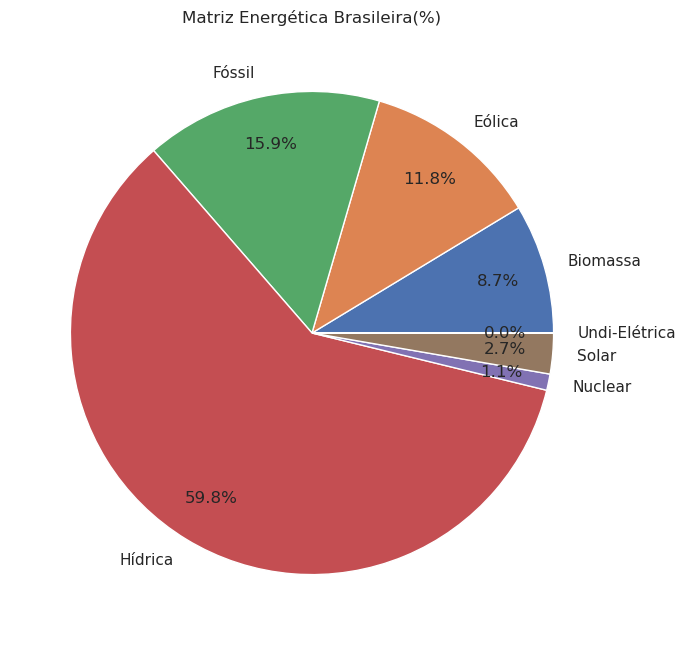

<IPython.core.display.Javascript object>

In [39]:
Potencia_Combustivel = energia.groupby(by=["DscOrigemCombustivel"])[
    ["MdaPotenciaFiscalizadaKw"]
].sum()

plt.figure(dpi=100, figsize=(8, 8))
plt.title("Matriz Energética Brasileira(%)")
plt.pie(
    Potencia_Combustivel["MdaPotenciaFiscalizadaKw"].values,
    labels=Potencia_Combustivel.index.values,
    autopct="%1.1f%%",
    pctdistance=0.8,
)
plt.show()

### Produção por Unidade Federativa

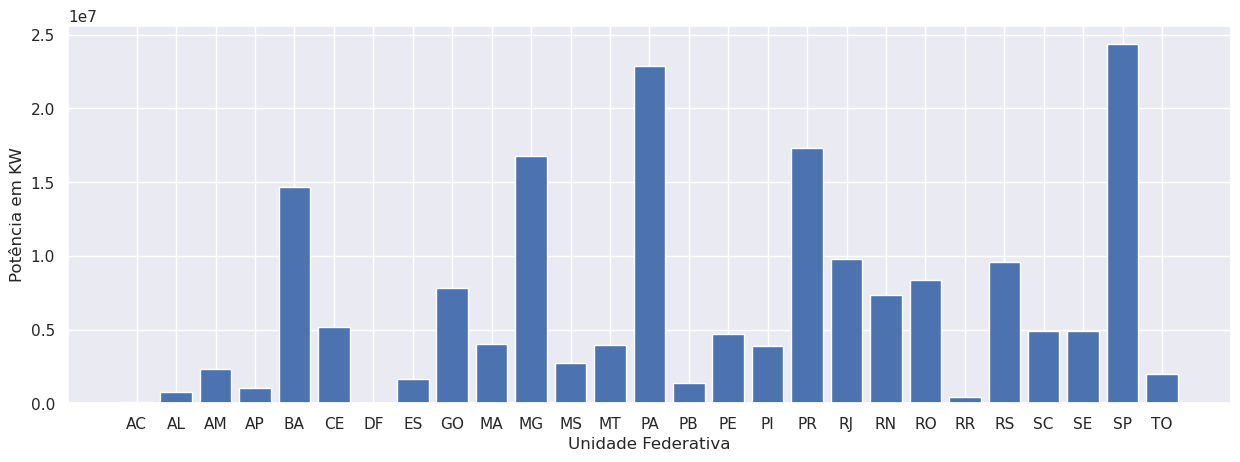

<IPython.core.display.Javascript object>

In [43]:
fig = plt.figure(dpi=100, figsize=(15, 5))
x_pos = np.arange(
    1,
    1
    + len(
        energia.groupby(by=["SigUFPrincipal"])[["MdaPotenciaFiscalizadaKw"]].sum().index
    ),
)
h = (
    energia.groupby(by=["SigUFPrincipal"])[["MdaPotenciaFiscalizadaKw"]]
    .sum()
    .values[:, 0]
)
plt.xticks(
    x_pos,
    energia.groupby(by=["SigUFPrincipal"])[["MdaPotenciaFiscalizadaKw"]].sum().index,
)
plt.bar(x_pos, h)
plt.ylabel("Potência em KW")
plt.xlabel("Unidade Federativa")
plt.show()

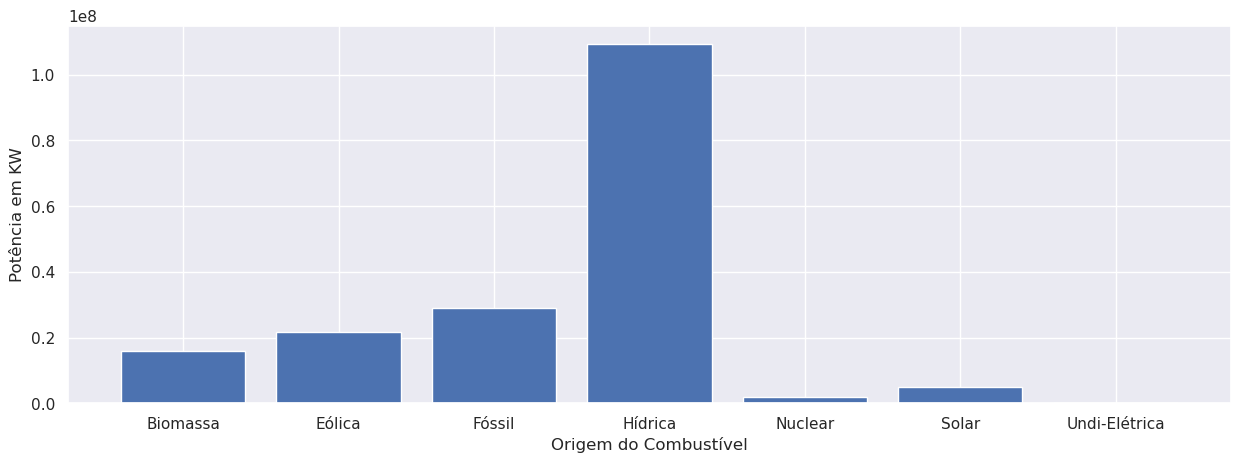

<IPython.core.display.Javascript object>

In [44]:
fig = plt.figure(dpi=100, figsize=(15, 5))
x_pos = np.arange(
    1,
    1
    + len(
        energia.groupby(by=["DscOrigemCombustivel"])[["MdaPotenciaFiscalizadaKw"]]
        .sum()
        .index
    ),
)
h = (
    energia.groupby(by=["DscOrigemCombustivel"])[["MdaPotenciaFiscalizadaKw"]]
    .sum()
    .values[:, 0]
)
plt.xticks(
    x_pos,
    energia.groupby(by=["DscOrigemCombustivel"])[["MdaPotenciaFiscalizadaKw"]]
    .sum()
    .index,
)
plt.bar(x_pos, h)
plt.ylabel("Potência em KW")
plt.xlabel("Origem do Combustível")
plt.show()

In [8]:
Combustivel_UF = energia.groupby(by=["DscOrigemCombustivel", "SigUFPrincipal"])[
    ["SigUFPrincipal"]
].count()
Combustivel_UF

SigUFPrincipal
DscOrigemCombustivel SigUFPrincipal                
Biomassa             AC                           2
                     AL                          21
                     AM                           7
                     AP                           1
                     BA                           8
...                                             ...
Solar                SC                           9
                     SE                           8
                     SP                          73
                     TO                           1
Undi-Elétrica        CE                           1

[120 rows x 1 columns]

<IPython.core.display.Javascript object>

<Figure size 1800x1500 with 0 Axes>

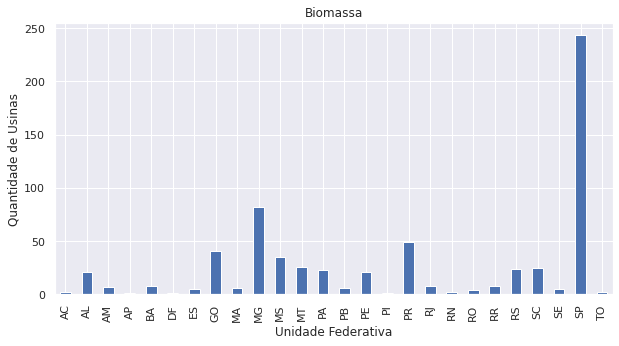

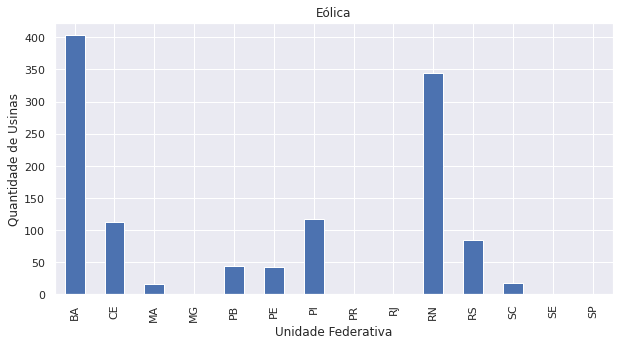

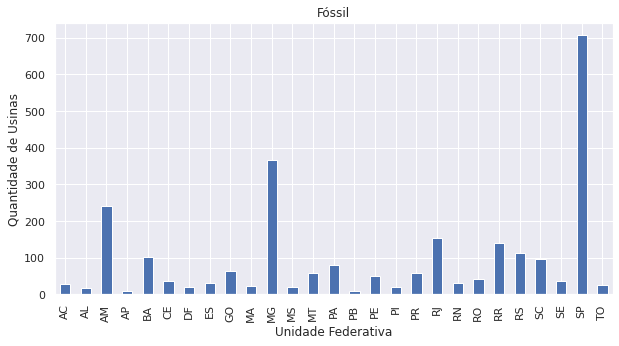

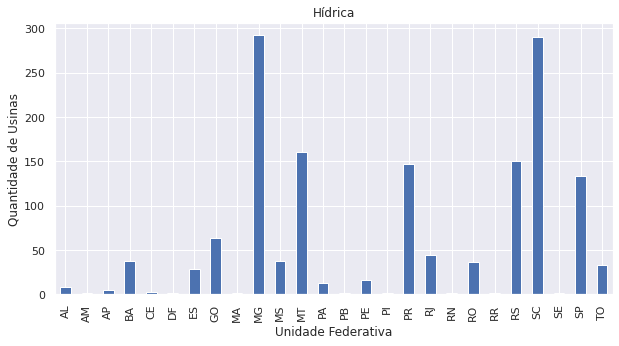

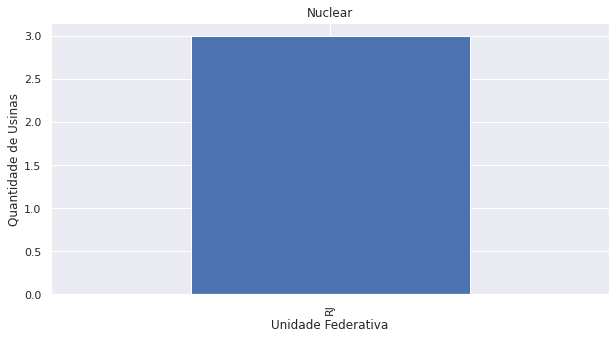

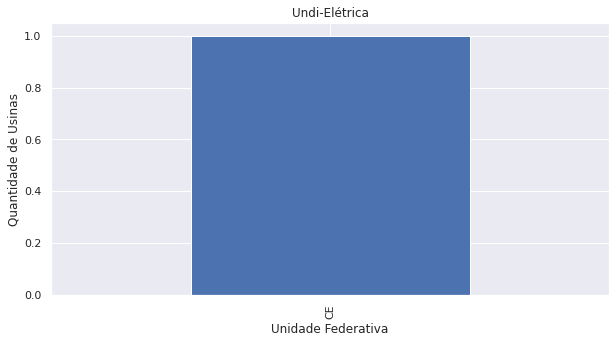

<IPython.core.display.Javascript object>

In [14]:
Tipos = ["Biomassa", "Eólica", "Fóssil", "Hídrica", "Nuclear", "Undi-Elétrica"]
Combustivel_UF = energia.groupby(by=["DscOrigemCombustivel", "SigUFPrincipal"])[
    ["SigUFPrincipal"]
].count()


fig = plt.figure(figsize=(18, 15), dpi=100)  # = plt.figure(dpi =100,figsize=(15,5))

i = 0
for comb in Tipos:
    Combustivel_UF.loc[(comb,)].plot(
        kind="bar",
        title=comb,
        figsize=(10, 5),
        legend=False,
        xlabel="Unidade Federativa",
        ylabel="Quantidade de Usinas",
    )
    i = i + 1

plt.show()

In [40]:
energia[
    [
        "NomEmpreendimento",
        "DscMuninicpios",
        "SigUFPrincipal",
        "SigTipoGeracao",
        "DatInicioVigencia",
        "DatFimVigencia",
        "DscPropriRegimePariticipacao",
    ]
].loc[lambda df: df["DscPropriRegimePariticipacao"].str.find("ELETROBRAS") != -1]

,NomEmpreendimento,DscMuninicpios,SigUFPrincipal,SigTipoGeracao,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao
29,Almirante Álvaro Alberto - Unidade I (Antiga A...,Angra dos Reis - RJ,RJ,UTN,1970-07-17,NaN,100% para ELETROBRAS TERMONUCLEAR S.A. - ELETR...
30,Almirante Álvaro Alberto - Unidade II (Antiga ...,Angra dos Reis - RJ,RJ,UTN,1970-07-17,NaN,100% para ELETROBRAS TERMONUCLEAR S.A. - ELETR...
1281,São Domingos,"Água Clara - MS, Ribas do Rio Pardo - MS",MS,UHE,2002-12-11,2037-12-11,100% para COMPANHIA DE GERAÇÃO E TRANSMISSÃO D...
1537,Barra do Rio Chapéu,"Rio Fortuna - SC, Santa Rosa de Lima - SC",SC,PCH,2004-05-05,2034-05-05,100% para COMPANHIA DE GERAÇÃO E TRANSMISSÃO D...
1676,João Borges,"Campo Belo do Sul - SC, Lages - SC, São José d...",SC,PCH,2005-12-21,2035-12-21,100% para COMPANHIA DE GERAÇÃO E TRANSMISSÃO D...
1788,Passo São João,"Dezesseis de Novembro - RS, Roque Gonzales - RS",RS,UHE,2006-08-15,2041-08-15,100% para COMPANHIA DE GERAÇÃO E TRANSMISSÃO D...
1913,Governador Jayme Canet Junior (Antiga MAUÁ),"Ortigueira - PR, Telêmaco Borba - PR",PR,UHE,2007-07-03,2042-07-03,51% para COPEL GERAÇÃO E TRANSMISSÃO S.A. (PIE...
2056,Candiota III,Candiota - RS,RS,UTE,2006-07-18,2041-09-18,100% para COMPANHIA DE GERAÇÃO E TRANSMISSÃO D...
2390,Almirante Álvaro Alberto - Unidade III (Antiga...,Angra dos Reis - RJ,RJ,UTN,1975-06-13,NaN,100% para ELETROBRAS TERMONUCLEAR S.A. - ELETR...
2549,Cerro Chato I (Antiga Coxilha Negra V),Santana do Livramento - RS,RS,EOL,2010-08-25,2045-08-25,100% para COMPANHIA DE GERAÇÃO E TRANSMISSÃO D...


<IPython.core.display.Javascript object>

# Empresas de Energia com Capital Aberto na B3 

In [8]:
B3 = pd.read_csv("EnergiaB3.csv", sep=";")
B3

,Razão Social,Nome de Pregão,Segmento,Código
0,AES BRASIL ENERGIA S.A.,AES BRASIL,NM,AESB
1,AES BRASIL OPERAÇÕES S.A.,AESOPERACOES,NaN,AESO
2,AFLUENTE TRANSMISSÃO DE ENERGIA ELÉTRICA S/A,AFLUENTE T,NaN,AFLT
3,ALUPAR INVESTIMENTO S/A,ALUPAR,N2,ALUP
4,AMPLA ENERGIA E SERVICOS S.A.,AMPLA ENERG,NaN,CBEE
...,...,...,...,...
56,STATKRAFT ENERGIAS RENOVAVEIS S.A.,STATKRAFT,NaN,STKF
57,TERMELÉTRICA PERNAMBUCO III S.A.,TERM. PE III,NaN,TEPE
58,TERMOPERNAMBUCO S.A.,TERMOPE,NaN,TMPE
59,TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.,TAESA,N2,TAEE


<IPython.core.display.Javascript object>

/bin/bash: 1: command not found


<IPython.core.display.Javascript object>